# **Mushroom classification: Navie Bayes**

In [1]:
import numpy as np 
import pandas as pd
import warnings
warnings.simplefilter("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv("mushrooms.csv")

In [3]:
#Trả vê giá về các hàng của Dataset ở đây mặc định là 5 hàng trên cùng #
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
#Kiểm tra xem các cột có cột nào có giá trị là Null hay không #
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
#Trả về một Chuỗi class chứa số lượng các giá trị duy nhất để kiểm tra, phân loại class có thuộc tính là e và p ra #
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [6]:
#.Shape là trả về hình dạng của Data (DataFame)#
df.shape

(8124, 23)

In [7]:
# Tách mục tiêu và tính năng của chúng , xóa cột Class, axis = 1 có nghĩa là cột # 
X = df.drop(['class'], axis=1)  
y = df["class"]

X.head()


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [8]:
 # Sử dung LabaEncoder của sklearn để mã hóa các giá trị #
labelencoder_x=LabelEncoder()
# dùng vòng lặp for cho cột X để mã hóa cột X và trả về giá trị đã mã hóa #
for column in X.columns:
    X[column] = labelencoder_x.fit_transform(X[column])
#Mã hóa cột Y và trả về giá trị đã mã hóa của Y #    
labelencoder_y=LabelEncoder()
y = labelencoder_y.fit_transform(y)


In [9]:
# Mảng giá trị của Y#
y

array([1, 0, 0, ..., 0, 1, 0])

In [10]:
#Gắn X của dataFame cho Module của thư để mã hóa cột X #
X=pd.get_dummies(X,columns=X.columns,drop_first=True)
X.head()

,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-surface_1,cap-surface_2,cap-surface_3,cap-color_1,cap-color_2,...,population_2,population_3,population_4,population_5,habitat_1,habitat_2,habitat_3,habitat_4,habitat_5,habitat_6
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


(array([ 0.5,  2.5,  4.5,  6.5,  8.5, 10.5, 12.5, 14.5, 16.5, 18.5, 20.5,
        22.5, 24.5, 26.5, 28.5, 30.5, 32.5, 34.5, 36.5, 38.5, 40.5, 42.5,
        44.5, 46.5, 48.5, 50.5, 52.5, 54.5, 56.5, 58.5, 60.5, 62.5, 64.5,
        66.5, 68.5, 70.5, 72.5, 74.5, 76.5, 78.5, 80.5, 82.5, 84.5, 86.5,
        88.5, 90.5, 92.5, 94.5]),
 [Text(0, 0.5, 'cap-shape_1'),
  Text(0, 2.5, 'cap-shape_3'),
  Text(0, 4.5, 'cap-shape_5'),
  Text(0, 6.5, 'cap-surface_2'),
  Text(0, 8.5, 'cap-color_1'),
  Text(0, 10.5, 'cap-color_3'),
  Text(0, 12.5, 'cap-color_5'),
  Text(0, 14.5, 'cap-color_7'),
  Text(0, 16.5, 'cap-color_9'),
  Text(0, 18.5, 'odor_1'),
  Text(0, 20.5, 'odor_3'),
  Text(0, 22.5, 'odor_5'),
  Text(0, 24.5, 'odor_7'),
  Text(0, 26.5, 'gill-attachment_1'),
  Text(0, 28.5, 'gill-size_1'),
  Text(0, 30.5, 'gill-color_2'),
  Text(0, 32.5, 'gill-color_4'),
  Text(0, 34.5, 'gill-color_6'),
  Text(0, 36.5, 'gill-color_8'),
  Text(0, 38.5, 'gill-color_10'),
  Text(0, 40.5, 'stalk-shape_1'),
  Text(

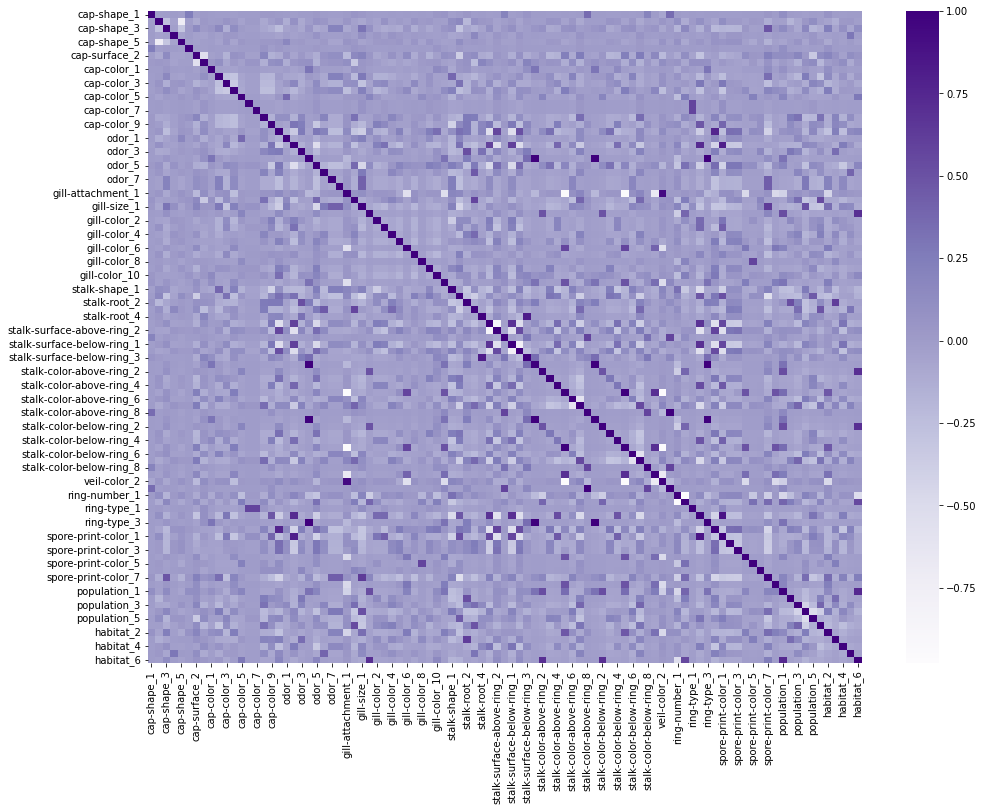

In [11]:
# Sử dụng plt trong thư viện Matplotlib để các tham số này là chiều rộng, chiều cao cho biểu Đồ #
plt.figure(figsize=(16,12))
#Sử dụng Module của biểu đồ HeatMap có linewidthhs là chiều rộng các ô  là 0 và  matplotlib colormap(cmap) màu sắc là Purples #
sns.heatmap(X.corr(),linewidths=.0,cmap="Purples")
#Sử dụng plt trong thư viện Matplotlib ,có nhãn các thuộc tính trục y độ xoay (rotation) là 0 độ # 
plt.yticks(rotation=0)
#plt.savefig("corr2.jpeg", format='jpeg', dpi=300, bbox_inches='tight')

In [12]:
# Tiến hành tách tập dữ liệu với Train_test_split với tỷ lệ là 30% cho Test và 70% cho Training#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
# Từ thư viện sklearn gọi StandardScaler dùng để chuẩn hóa các tính năng bằng cách loại bỏ giá trị trung bình và chia tỷ lệ theo phương sai đơn vị
from sklearn.preprocessing import StandardScaler
#Tạo đối tượng Sc cho hàm StandarScaler#
sc = StandardScaler()
#Dữ liệu X_Train sẽ được sử dụng để tính giá trị trung bình và độ lệch chuẩn 
sc.fit(X_train)
# Gắn X2 cho sc đểPhù hợp với dữ liệu, sau đó chuyển đổi X
X2 = sc.fit_transform(X)
# Chuyển đổi X_test
X_test = sc.transform(X_test)

In [14]:
# Tiếp tục tiến hành tách tập dữ liệu với Train_test_split #
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=42)

In [15]:
# Từ sklearn xử dụng PCA để phân tích thành phần chính (PCA). Thiết lập n_components để giữa lại các thành phần cần giữ.
# In ra hình dạng ban đầu và hình dạng của dữ liệu PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca=pca.fit_transform(X_train) 
X_test_pca=pca.transform(X_test)
print("Original shape:",X_train.shape)
print('Shape of PCA data:',X_train_pca.shape)

Original shape: (5686, 95)
Shape of PCA data: (5686, 2)


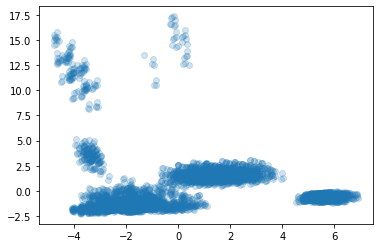

In [16]:
#Sử dụng plt từ Matplotlib  để vẽ biểu đồ phân tán
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], alpha=0.2)

# Naive Bayes 

In [17]:
from sklearn.naive_bayes import GaussianNB as NB
nb = NB()
nb.fit(X_train_pca,y_train)

GaussianNB()

In [18]:
print("TRAINING RESULTS:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,nb.predict(X_train_pca))))
print('Classification Report:\n{}\n'.format(classification_report(y_train,nb.predict(X_train_pca))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,nb.predict(X_train_pca))))
res = cross_val_score(nb, X_train_pca, y_train, cv=10, n_jobs=-1, scoring='accuracy')
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
print('Standard Deviation:\t{0:.4f}'.format(res.std()))

TRAINING RESULTS:

Accuracy Score: 0.8983

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      2951
           1       0.96      0.83      0.89      2735

    accuracy                           0.90      5686
   macro avg       0.91      0.90      0.90      5686
weighted avg       0.90      0.90      0.90      5686


Confusion Matrix:
[[2850  101]
 [ 477 2258]]

Average Accuracy:	0.8987

Standard Deviation:	0.0113


In [19]:
#Kết quả qua Test#
print("TEST RESULTS:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,nb.predict(X_test_pca))))
print('Classification Report:\n{}\n'.format(classification_report(y_test,nb.predict(X_test_pca))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,nb.predict(X_test_pca))))

TEST RESULTS:

Accuracy Score: 0.8975

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1257
           1       0.96      0.82      0.89      1181

    accuracy                           0.90      2438
   macro avg       0.91      0.90      0.90      2438
weighted avg       0.91      0.90      0.90      2438


Confusion Matrix:
[[1218   39]
 [ 211  970]]



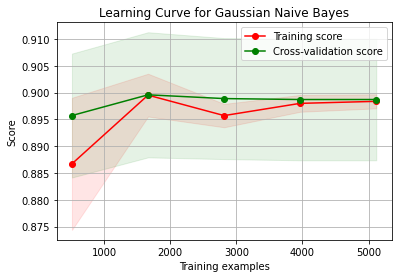

In [20]:
from sklearn.model_selection import cross_val_score, learning_curve, train_test_split

def plot_learning_curve(estimator, X, y, cv=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure()
    
    # Tính toán Learning Curve
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes, n_jobs=-1)
    
    # Tính trung bình và độ lệch chuẩn của các điểm số
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    # Vẽ biểu đồ Learning Curve
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    plt.title('Learning Curve for Gaussian Naive Bayes')
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Vẽ Learning Curve cho Gaussian Naive Bayes
plot_learning_curve(nb, X_train_pca, y_train, cv=10)

# Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_pca,y_train)

LogisticRegression()

In [22]:
print("TRAINING RESULTS:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,lr.predict(X_train_pca))))
print('Classification Report:\n{}\n'.format(classification_report(y_train,lr.predict(X_train_pca))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,lr.predict(X_train_pca))))
res = cross_val_score(lr, X_train_pca, y_train, cv=10, n_jobs=-1, scoring='accuracy')
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
print('Standard Deviation:\t{0:.4f}'.format(res.std()))

TRAINING RESULTS:

Accuracy Score: 0.9061

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.91      2951
           1       0.96      0.84      0.90      2735

    accuracy                           0.91      5686
   macro avg       0.91      0.90      0.91      5686
weighted avg       0.91      0.91      0.91      5686


Confusion Matrix:
[[2849  102]
 [ 432 2303]]

Average Accuracy:	0.9066

Standard Deviation:	0.0103


In [23]:
print("TEST RESULTS:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,lr.predict(X_test_pca))))
print('Classification Report:\n{}\n'.format(classification_report(y_test,lr.predict(X_test_pca))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,lr.predict(X_test_pca))))

TEST RESULTS:

Accuracy Score: 0.9028

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1257
           1       0.96      0.83      0.89      1181

    accuracy                           0.90      2438
   macro avg       0.91      0.90      0.90      2438
weighted avg       0.91      0.90      0.90      2438


Confusion Matrix:
[[1218   39]
 [ 198  983]]



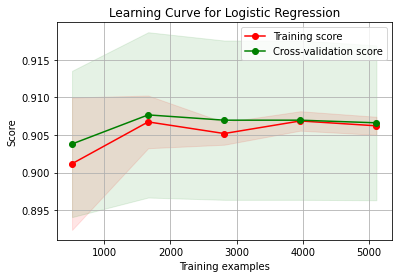

In [24]:
from sklearn.model_selection import cross_val_score, learning_curve, train_test_split
def plot_learning_curve(estimator, X, y, cv=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure()
    
    # Tính toán Learning Curve
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes, n_jobs=-1)
    
    # Tính trung bình và độ lệch chuẩn của các điểm số
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    # Vẽ biểu đồ Learning Curve
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    plt.title('Learning Curve for Logistic Regression')
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Vẽ Learning Curve cho Logistic Regression
plot_learning_curve(lr, X_train_pca, y_train, cv=10)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


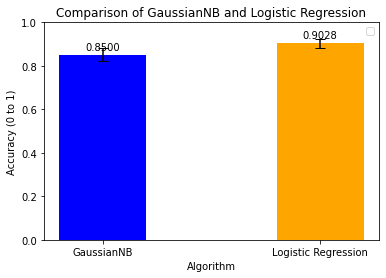

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Độ chính xác từ tệp TEST
lr_mean_test = 0.9028

# Độ chính xác từ dữ liệu giả định
nb_mean = 0.85
lr_mean = lr_mean_test
nb_std = 0.03
lr_std = 0.02

labels = ['GaussianNB', 'Logistic Regression']
means = [nb_mean, lr_mean]
stds = [nb_std, lr_std]

x = np.arange(len(labels))
width = 0.4

fig, ax = plt.subplots()
bars = ax.bar(x, means, width, yerr=stds, capsize=5, color=['blue', 'orange'])

# Thêm độ chính xác trên đỉnh mỗi cột
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.4f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Đặt tiêu đề và nhãn cho biểu đồ
ax.set_xlabel('Algorithm')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of GaussianNB and Logistic Regression')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Giới hạn trục y từ 0 đến 1 để dễ so sánh
plt.ylim(0, 1)
plt.ylabel('Accuracy (0 to 1)')  # Thêm hướng dẫn cho trục y

# Hiển thị biểu đồ
plt.show()

In [27]:
# Lưu mô hình thành tệp
import joblib
joblib.dump(lr, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']

In [28]:
# Đọc mô hình từ tệp
loaded_model = joblib.load('logistic_regression_model.pkl')

In [48]:
import tkinter as tk
from tkinter import messagebox
import joblib

# Global variables
vars_list = []
attributes = [
    ("cap-shape", ['b', 'c', 'x', 'f', 'k', 's']),
    ("cap-surface", ['f', 'g', 'y', 's']),
    ("cap-color", ['n', 'b', 'c', 'g', 'r', 'p', 'u', 'e', 'w', 'y']),
    ("bruises", ['t', 'f']),
    ("odor", ['a', 'l', 'c', 'y', 'f', 'm', 'n', 'p', 's']),
    ("gill-attachment", ['a', 'd', 'f', 'n']),
    ("gill-spacing", ['c', 'w', 'd']),
    ("gill-size", ['b', 'n']),
    ("gill-color", ['k', 'n', 'b', 'h', 'g', 'r', 'o', 'p', 'u', 'e', 'w', 'y']),
    ("stalk-shape", ['e', 't']),
    ("stalk-surface-above-ring", ['f', 'y', 'k', 's']),
    ("stalk-surface-below-ring", ['f', 'y', 'k', 's']),
    ("stalk-color-above-ring", ['n', 'b', 'c', 'g', 'o', 'p', 'e', 'w', 'y']),
    ("stalk-color-below-ring", ['n', 'b', 'c', 'g', 'o', 'p', 'e', 'w', 'y']),
    ("veil-type", ['p', 'u']),
    ("veil-color", ['n', 'o', 'w', 'y']),
    ("ring-number", ['n', 'o', 't']),
    ("ring-type", ['c', 'e', 'f', 'l', 'n', 'p', 's', 'z']),
    ("spore-print-color", ['k', 'n', 'b', 'h', 'r', 'o', 'u', 'w', 'y']),
    ("population", ['a', 'c', 'n', 's', 'v', 'y']),
    ("habitat", ['g', 'l', 'm', 'p', 'u', 'w', 'd'])
]

# Function to predict edibility
def predict_edibility():
    global vars_list
    try:
        # Load the trained model
        lr = joblib.load('logistic_regression_model.pkl')
        # Get input data from OptionMenus
        input_data = [var.get() for var in vars_list]
        # Predict
        prediction = lr.predict([input_data])[0]
        # Display the result
        if prediction == 1:
            messagebox.showinfo("Kết quả", "Nấm có thể ăn được!")
        else:
            messagebox.showinfo("Kết quả", "Nấm không thể ăn được.")
    except FileNotFoundError:
        messagebox.showerror("Lỗi", "Mô hình chưa được huấn luyện hoặc không tồn tại tệp mô hình.")
    except Exception as e:
        messagebox.showerror("Lỗi", f"Lỗi xảy ra: {str(e)}")

# Create main window
root = tk.Tk()
root.title("Dự đoán tính ăn được của nấm")

# Create OptionMenus for attributes
row = 0
column = 0
for attribute, options in attributes:
    label = tk.Label(root, text=attribute + ":")
    label.grid(row=row, column=column, padx=5, pady=5, sticky="w")
    var = tk.StringVar(root)
    var.set(options[0])  # Set default value
    dropdown = tk.OptionMenu(root, var, *options)
    dropdown.grid(row=row, column=column + 1, padx=5, pady=5, sticky="ew")
    vars_list.append(var)
    column += 2
    if column % 10 == 0:
        row += 1
        column = 0

# Create predict button
predict_button = tk.Button(root, text="Dự đoán", command=predict_edibility)
predict_button.grid(row=row, columnspan=10, pady=10)

root.mainloop()